In [2]:
!pip install tensorflow
!pip install keras


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

train_emoticon_df = pd.read_csv("datasets/train/train_emoticon.csv")
train_emoticon_X = train_emoticon_df['input_emoticon'].tolist()
train_emoticon_Y = train_emoticon_df['label'].tolist()

# Load validation data properly
valid_emoticon_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
valid_emoticon_X = valid_emoticon_df['input_emoticon'].tolist()
valid_emoticon_Y = valid_emoticon_df['label'].tolist()

X= train_emoticon_X
y = train_emoticon_Y

In [5]:
# Character-level tokenizer for emoticons
tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(train_emoticon_X)

# Convert emoticons into sequences of integers for both train and validation sets
train_sequences = tokenizer.texts_to_sequences(train_emoticon_X)
valid_sequences = tokenizer.texts_to_sequences(valid_emoticon_X)

# Padding to ensure all sequences are of the same length for both train and validation sets
max_len = max(len(seq) for seq in train_sequences)  # Ensuring max_len is consistent for both sets
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post')
valid_padded = pad_sequences(valid_sequences, maxlen=max_len, padding='post')

In [6]:
# One-hot encode the integer sequences (each token becomes a one-hot vector)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because Keras indexing starts from 1
train_one_hot = tf.keras.utils.to_categorical(train_padded, num_classes=vocab_size)
valid_one_hot = tf.keras.utils.to_categorical(valid_padded, num_classes=vocab_size)

In [7]:
# Encode the labels for both train and validation sets
label_encoder = LabelEncoder()
train_encoded = label_encoder.fit_transform(train_emoticon_Y)
valid_encoded = label_encoder.transform(valid_emoticon_Y)



Training with: LSTM Units=10, Batch Size=32, LR=0.001, Epochs=10


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5084 - loss: 0.6930 - val_accuracy: 0.6401 - val_loss: 0.6835
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6240 - loss: 0.6762 - val_accuracy: 0.7914 - val_loss: 0.5154
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7650 - loss: 0.5197 - val_accuracy: 0.8487 - val_loss: 0.3923
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8258 - loss: 0.4227 - val_accuracy: 0.8732 - val_loss: 0.3272
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8534 - loss: 0.3604 - val_accuracy: 0.8998 - val_loss: 0.2958
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8676 - loss: 0.3303 - val_accuracy: 0.8957 - val_loss: 0.2799
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8778 - loss: 0.3100 - val_accuracy: 0.9080 - val_loss: 0.2529
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8769 - loss: 0.3055 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5279 - loss: 0.6919 - val_accuracy: 0.5890 - val_loss: 0.6836
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6035 - loss: 0.6800 - val_accuracy: 0.6912 - val_loss: 0.5992
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7373 - loss: 0.5483 - val_accuracy: 0.8712 - val_loss: 0.4002
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8211 - loss: 0.4224 - val_accuracy: 0.8834 - val_loss: 0.3331
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8465 - loss: 0.3665 - val_accuracy: 0.8875 - val_loss: 0.2940
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8651 - loss: 0.3339 - val_accuracy: 0.8957 - val_loss: 0.2757
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8684 - loss: 0.3172 - val_accuracy: 0.9039 - val_loss: 0.2655
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8886 - loss: 0.2852 - val_accuracy: 0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5203 - loss: 0.6923 - val_accuracy: 0.5317 - val_loss: 0.6795
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6487 - loss: 0.6651 - val_accuracy: 0.7914 - val_loss: 0.4923
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7855 - loss: 0.4911 - val_accuracy: 0.8712 - val_loss: 0.3805
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8359 - loss: 0.4042 - val_accuracy: 0.9039 - val_loss: 0.3220
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8572 - loss: 0.3539 - val_accuracy: 0.9059 - val_loss: 0.2796
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8773 - loss: 0.3176 - val_accuracy: 0.9039 - val_loss: 0.2630
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8757 - loss: 0.3043 - val_accuracy: 0.9100 - val_loss: 0.2422
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8830 - loss: 0.2917 - val_accuracy: 0.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5350 - loss: 0.6813 - val_accuracy: 0.8425 - val_loss: 0.4146
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8135 - loss: 0.4321 - val_accuracy: 0.8875 - val_loss: 0.2853
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8632 - loss: 0.3315 - val_accuracy: 0.9100 - val_loss: 0.2441
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8839 - loss: 0.2884 - val_accuracy: 0.9080 - val_loss: 0.2277
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8976 - loss: 0.2591 - val_accuracy: 0.9182 - val_loss: 0.2168
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8939 - loss: 0.2565 - val_accuracy: 0.9264 - val_loss: 0.2054
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9134 - loss: 0.2315 - val_accuracy: 0.9223 - val_loss: 0.1835
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9240 - loss: 0.2146 - val_accuracy: 0

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5521 - loss: 0.6835 - val_accuracy: 0.8425 - val_loss: 0.4524
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8053 - loss: 0.4351 - val_accuracy: 0.8896 - val_loss: 0.2895
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8604 - loss: 0.3253 - val_accuracy: 0.8896 - val_loss: 0.2643
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8810 - loss: 0.2801 - val_accuracy: 0.9100 - val_loss: 0.2184
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8945 - loss: 0.2634 - val_accuracy: 0.9141 - val_loss: 0.2079
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8992 - loss: 0.2415 - val_accuracy: 0.9059 - val_loss: 0.1949
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9059 - loss: 0.2327 - val_accuracy: 0.9162 - val_loss: 0.1918
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9219 - loss: 0.2015 - val_accuracy: 0.

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5534 - loss: 0.6829 - val_accuracy: 0.8098 - val_loss: 0.4545
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8262 - loss: 0.4197 - val_accuracy: 0.9039 - val_loss: 0.2864
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8653 - loss: 0.3208 - val_accuracy: 0.9018 - val_loss: 0.2497
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8920 - loss: 0.2825 - val_accuracy: 0.9080 - val_loss: 0.2373
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8901 - loss: 0.2712 - val_accuracy: 0.9162 - val_loss: 0.2260
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9063 - loss: 0.2344 - val_accuracy: 0.9182 - val_loss: 0.2016
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9068 - loss: 0.2433 - val_accuracy: 0.9121 - val_loss: 0.2071
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9163 - loss: 0.2226 - val_accuracy: 0.

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5567 - loss: 0.6702 - val_accuracy: 0.8773 - val_loss: 0.3407
Epoch 2/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8372 - loss: 0.3769 - val_accuracy: 0.8998 - val_loss: 0.2553
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8866 - loss: 0.2843 - val_accuracy: 0.9039 - val_loss: 0.2148
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8898 - loss: 0.2652 - val_accuracy: 0.9162 - val_loss: 0.2069
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9108 - loss: 0.2225 - val_accuracy: 0.9243 - val_loss: 0.1976
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9086 - loss: 0.2243 - val_accuracy: 0.9264 - val_loss: 0.1741
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9179 - loss: 0.1981 - val_accuracy: 0.9346 - val_loss: 0.1777
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9313 - loss: 0.1846 - val_accuracy: 0.

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5768 - loss: 0.6665 - val_accuracy: 0.8753 - val_loss: 0.3293
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8421 - loss: 0.3660 - val_accuracy: 0.9100 - val_loss: 0.2468
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8822 - loss: 0.2848 - val_accuracy: 0.9080 - val_loss: 0.2277
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8973 - loss: 0.2561 - val_accuracy: 0.9100 - val_loss: 0.2099
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9029 - loss: 0.2391 - val_accuracy: 0.9223 - val_loss: 0.1879
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9158 - loss: 0.1991 - val_accuracy: 0.9284 - val_loss: 0.1791
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9218 - loss: 0.1975 - val_accuracy: 0.9305 - val_loss: 0.1606
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9310 - loss: 0.1827 - val_accuracy: 0.

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5793 - loss: 0.6580 - val_accuracy: 0.8814 - val_loss: 0.3286
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8439 - loss: 0.3656 - val_accuracy: 0.9039 - val_loss: 0.2596
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8719 - loss: 0.3027 - val_accuracy: 0.9080 - val_loss: 0.2150
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8921 - loss: 0.2520 - val_accuracy: 0.9202 - val_loss: 0.2016
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9082 - loss: 0.2355 - val_accuracy: 0.9202 - val_loss: 0.1757
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9098 - loss: 0.2223 - val_accuracy: 0.9121 - val_loss: 0.1812
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9188 - loss: 0.2019 - val_accuracy: 0.9325 - val_loss: 0.1455
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9226 - loss: 0.1887 - val_accuracy: 0.

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5264 - loss: 0.6917 - val_accuracy: 0.5808 - val_loss: 0.6871
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6068 - loss: 0.6731 - val_accuracy: 0.7055 - val_loss: 0.5833
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7478 - loss: 0.5548 - val_accuracy: 0.7996 - val_loss: 0.4763
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7975 - loss: 0.4686 - val_accuracy: 0.8548 - val_loss: 0.4002
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8283 - loss: 0.4204 - val_accuracy: 0.8753 - val_loss: 0.3445
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8512 - loss: 0.3765 - val_accuracy: 0.8957 - val_loss: 0.3086
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8702 - loss: 0.3405 - val_accuracy: 0.9039 - val_loss: 0.2827
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8648 - loss: 0.3366 - val_accuracy: 0

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5140 - loss: 0.6920 - val_accuracy: 0.6626 - val_loss: 0.6823
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6204 - loss: 0.6771 - val_accuracy: 0.7607 - val_loss: 0.5526
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7440 - loss: 0.5485 - val_accuracy: 0.8282 - val_loss: 0.4374
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8003 - loss: 0.4544 - val_accuracy: 0.8589 - val_loss: 0.3724
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8306 - loss: 0.3870 - val_accuracy: 0.8875 - val_loss: 0.3313
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8499 - loss: 0.3637 - val_accuracy: 0.8916 - val_loss: 0.3059
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8589 - loss: 0.3424 - val_accuracy: 0.8978 - val_loss: 0.2804
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8744 - loss: 0.3215 - val_accuracy: 

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5295 - loss: 0.6912 - val_accuracy: 0.6155 - val_loss: 0.6857
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5955 - loss: 0.6834 - val_accuracy: 0.7055 - val_loss: 0.6590
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7101 - loss: 0.6109 - val_accuracy: 0.8344 - val_loss: 0.4418
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7919 - loss: 0.4811 - val_accuracy: 0.8609 - val_loss: 0.3749
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8308 - loss: 0.4097 - val_accuracy: 0.8834 - val_loss: 0.3296
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8455 - loss: 0.3771 - val_accuracy: 0.9121 - val_loss: 0.2959
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8703 - loss: 0.3408 - val_accuracy: 0.9100 - val_loss: 0.2723
Epoch 8/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8731 - loss: 0.3169 - val_accuracy: 0

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5375 - loss: 0.6876 - val_accuracy: 0.8057 - val_loss: 0.5200
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7780 - loss: 0.4894 - val_accuracy: 0.8793 - val_loss: 0.3067
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8567 - loss: 0.3486 - val_accuracy: 0.8978 - val_loss: 0.2685
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8779 - loss: 0.2978 - val_accuracy: 0.8978 - val_loss: 0.2369
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8937 - loss: 0.2761 - val_accuracy: 0.9182 - val_loss: 0.2195
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9009 - loss: 0.2456 - val_accuracy: 0.9080 - val_loss: 0.2192
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8996 - loss: 0.2407 - val_accuracy: 0.9182 - val_loss: 0.1994
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8987 - loss: 0.2527 - val_accuracy: 0

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_13 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5338 - loss: 0.6895 - val_accuracy: 0.7485 - val_loss: 0.5936
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7562 - loss: 0.5251 - val_accuracy: 0.8855 - val_loss: 0.3363
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8629 - loss: 0.3545 - val_accuracy: 0.8937 - val_loss: 0.2811
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8788 - loss: 0.3041 - val_accuracy: 0.9121 - val_loss: 0.2386
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8987 - loss: 0.2686 - val_accuracy: 0.9121 - val_loss: 0.2253
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8959 - loss: 0.2585 - val_accuracy: 0.9141 - val_loss: 0.2173
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9047 - loss: 0.2376 - val_accuracy: 0.9202 - val_loss: 0.1910
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9107 - loss: 0.2319 - val_accuracy: 

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.5460 - loss: 0.6870 - val_accuracy: 0.8262 - val_loss: 0.5700
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7738 - loss: 0.5020 - val_accuracy: 0.9018 - val_loss: 0.3210
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8560 - loss: 0.3528 - val_accuracy: 0.9018 - val_loss: 0.2667
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.8778 - loss: 0.3076 - val_accuracy: 0.9162 - val_loss: 0.2404
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8899 - loss: 0.2758 - val_accuracy: 0.9121 - val_loss: 0.2264
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9051 - loss: 0.2478 - val_accuracy: 0.9121 - val_loss: 0.2337
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8962 - loss: 0.2478 - val_accuracy: 0.9162 - val_loss: 0.2066
Epoch 8/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9060 - loss: 0.2417 - val_accu

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.5642 - loss: 0.6753 - val_accuracy: 0.8569 - val_loss: 0.3852
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8212 - loss: 0.4105 - val_accuracy: 0.9121 - val_loss: 0.2609
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8730 - loss: 0.3071 - val_accuracy: 0.8937 - val_loss: 0.2442
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8920 - loss: 0.2635 - val_accuracy: 0.9039 - val_loss: 0.2329
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9032 - loss: 0.2448 - val_accuracy: 0.9182 - val_loss: 0.2114
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9112 - loss: 0.2227 - val_accuracy: 0.9243 - val_loss: 0.1794
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9116 - loss: 0.2180 - val_accuracy: 0.9162 - val_loss: 0.1974
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9340 - loss: 0.1838 - val_accuracy

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5504 - loss: 0.6737 - val_accuracy: 0.8650 - val_loss: 0.3809
Epoch 2/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8275 - loss: 0.3978 - val_accuracy: 0.8957 - val_loss: 0.2545
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8766 - loss: 0.2986 - val_accuracy: 0.9100 - val_loss: 0.2355
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8952 - loss: 0.2655 - val_accuracy: 0.9080 - val_loss: 0.2183
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8984 - loss: 0.2487 - val_accuracy: 0.9202 - val_loss: 0.1930
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9137 - loss: 0.2119 - val_accuracy: 0.9243 - val_loss: 0.1754
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9219 - loss: 0.2015 - val_accuracy: 0.9202 - val_loss: 0.1749
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9190 - loss: 0.1980 - val_accur

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_17 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5561 - loss: 0.6801 - val_accuracy: 0.8528 - val_loss: 0.3943
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8265 - loss: 0.4110 - val_accuracy: 0.8978 - val_loss: 0.2680
Epoch 3/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8764 - loss: 0.3051 - val_accuracy: 0.9080 - val_loss: 0.2357
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8911 - loss: 0.2757 - val_accuracy: 0.9202 - val_loss: 0.2069
Epoch 5/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8957 - loss: 0.2601 - val_accuracy: 0.9162 - val_loss: 0.2066
Epoch 6/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8984 - loss: 0.2402 - val_accuracy: 0.9305 - val_loss: 0.1751
Epoch 7/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9043 - loss: 0.2312 - val_accuracy: 0.9264 - val_loss: 0.1748
Epoch 8/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9231 - loss: 0.1974 - val_accura

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5171 - loss: 0.6925 - val_accuracy: 0.5706 - val_loss: 0.6880
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5961 - loss: 0.6845 - val_accuracy: 0.6360 - val_loss: 0.6716
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6690 - loss: 0.6511 - val_accuracy: 0.7935 - val_loss: 0.4839
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7568 - loss: 0.5062 - val_accuracy: 0.8528 - val_loss: 0.3872
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8226 - loss: 0.4237 - val_accuracy: 0.8793 - val_loss: 0.3350
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8445 - loss: 0.3755 - val_accuracy: 0.8732 - val_loss: 0.3124
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8612 - loss: 0.3506 - val_accuracy: 0.8916 - val_loss: 0.2910
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8722 - loss: 0.3238 - val_accur

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5061 - loss: 0.6940 - val_accuracy: 0.5521 - val_loss: 0.6887
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5815 - loss: 0.6871 - val_accuracy: 0.6585 - val_loss: 0.6752
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6528 - loss: 0.6625 - val_accuracy: 0.7996 - val_loss: 0.5112
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7682 - loss: 0.5193 - val_accuracy: 0.8344 - val_loss: 0.4096
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8123 - loss: 0.4458 - val_accuracy: 0.8569 - val_loss: 0.3600
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8540 - loss: 0.3819 - val_accuracy: 0.8732 - val_loss: 0.3140
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8591 - loss: 0.3471 - val_accuracy: 0.8916 - val_loss: 0.2981
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8655 - loss: 0.3298 - val_accuracy

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5089 - loss: 0.6934 - val_accuracy: 0.6053 - val_loss: 0.6862
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5800 - loss: 0.6846 - val_accuracy: 0.6830 - val_loss: 0.6695
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6687 - loss: 0.6468 - val_accuracy: 0.8119 - val_loss: 0.4821
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7728 - loss: 0.5042 - val_accuracy: 0.8405 - val_loss: 0.4014
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8177 - loss: 0.4327 - val_accuracy: 0.8814 - val_loss: 0.3614
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8413 - loss: 0.3850 - val_accuracy: 0.8834 - val_loss: 0.3211
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8546 - loss: 0.3699 - val_accuracy: 0.8937 - val_loss: 0.2933
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8625 - loss: 0.3428 - val_accuracy

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.5344 - loss: 0.6897 - val_accuracy: 0.7648 - val_loss: 0.6115
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7471 - loss: 0.5461 - val_accuracy: 0.9121 - val_loss: 0.3278
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8482 - loss: 0.3693 - val_accuracy: 0.8916 - val_loss: 0.2796
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8644 - loss: 0.3328 - val_accuracy: 0.9039 - val_loss: 0.2569
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8789 - loss: 0.2918 - val_accuracy: 0.9121 - val_loss: 0.2263
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8892 - loss: 0.2705 - val_accuracy: 0.9141 - val_loss: 0.2116
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8980 - loss: 0.2522 - val_accuracy: 0.9018 - val_loss: 0.2172
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9071 - loss: 0.2447 - val_accur

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5190 - loss: 0.6929 - val_accuracy: 0.6687 - val_loss: 0.6692
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7142 - loss: 0.5927 - val_accuracy: 0.8589 - val_loss: 0.3940
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8409 - loss: 0.3841 - val_accuracy: 0.8978 - val_loss: 0.2919
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8656 - loss: 0.3318 - val_accuracy: 0.9100 - val_loss: 0.2473
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8838 - loss: 0.2889 - val_accuracy: 0.8957 - val_loss: 0.2424
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9015 - loss: 0.2560 - val_accuracy: 0.9100 - val_loss: 0.2256
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8977 - loss: 0.2549 - val_accuracy: 0.9080 - val_loss: 0.2163
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9104 - loss: 0.2321 - val_accura

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_23 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.5439 - loss: 0.6879 - val_accuracy: 0.7791 - val_loss: 0.5812
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7523 - loss: 0.5238 - val_accuracy: 0.8753 - val_loss: 0.3578
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8395 - loss: 0.3856 - val_accuracy: 0.8916 - val_loss: 0.2862
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8713 - loss: 0.3175 - val_accuracy: 0.9039 - val_loss: 0.2454
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8800 - loss: 0.2969 - val_accuracy: 0.9039 - val_loss: 0.2385
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8919 - loss: 0.2729 - val_accuracy: 0.8957 - val_loss: 0.2318
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8975 - loss: 0.2537 - val_accuracy: 0.9080 - val_loss: 0.2208
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9074 - loss: 0.2476 - val_accuracy

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.5628 - loss: 0.6786 - val_accuracy: 0.8487 - val_loss: 0.4204
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8307 - loss: 0.4147 - val_accuracy: 0.8834 - val_loss: 0.2724
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8717 - loss: 0.3112 - val_accuracy: 0.8957 - val_loss: 0.2468
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8853 - loss: 0.2797 - val_accuracy: 0.9162 - val_loss: 0.2149
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8896 - loss: 0.2746 - val_accuracy: 0.9202 - val_loss: 0.2068
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8958 - loss: 0.2519 - val_accuracy: 0.9223 - val_loss: 0.1915
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9149 - loss: 0.2191 - val_accuracy: 0.9223 - val_loss: 0.1901
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9158 - loss: 0.2176 - val_accura

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_25 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5512 - loss: 0.6865 - val_accuracy: 0.8139 - val_loss: 0.4619
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7963 - loss: 0.4566 - val_accuracy: 0.8896 - val_loss: 0.3003
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8765 - loss: 0.3101 - val_accuracy: 0.9059 - val_loss: 0.2287
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8826 - loss: 0.2832 - val_accuracy: 0.9059 - val_loss: 0.2169
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8875 - loss: 0.2807 - val_accuracy: 0.9080 - val_loss: 0.2108
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9061 - loss: 0.2516 - val_accuracy: 0.9141 - val_loss: 0.2037
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9138 - loss: 0.2222 - val_accuracy: 0.9325 - val_loss: 0.1874
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9194 - loss: 0.2109 - val_accurac

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,062 (35.40 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.5608 - loss: 0.6782 - val_accuracy: 0.7914 - val_loss: 0.4450
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8112 - loss: 0.4387 - val_accuracy: 0.8957 - val_loss: 0.2852
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8661 - loss: 0.3299 - val_accuracy: 0.9039 - val_loss: 0.2298
Epoch 4/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8854 - loss: 0.2864 - val_accuracy: 0.9039 - val_loss: 0.2287
Epoch 5/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8891 - loss: 0.2652 - val_accuracy: 0.9100 - val_loss: 0.2047
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9075 - loss: 0.2349 - val_accuracy: 0.9202 - val_loss: 0.1906
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9096 - loss: 0.2330 - val_accuracy: 0.9264 - val_loss: 0.1827
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9158 - loss: 0.2135 - val_accuracy:

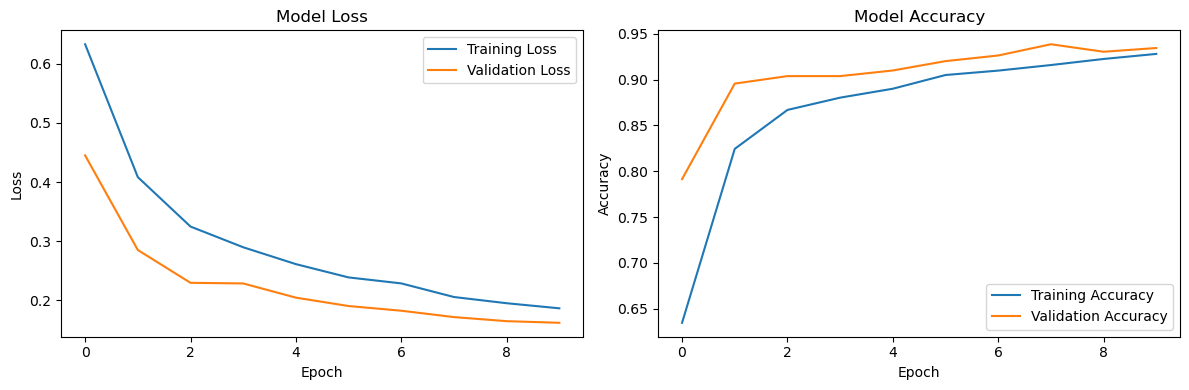

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import itertools
import tensorflow as tf

# Define hyperparameter grid
lstm_units_options = [10, 20]
batch_size_options = [32, 50, 64]
learning_rate_options = [0.001, 0.003, 0.005]
epochs_options = [10, 20, 30]

# Create a list of all combinations of hyperparameters
hyperparameter_combinations = list(itertools.product(lstm_units_options, batch_size_options, learning_rate_options, epochs_options))

# Modified early stopping with more lenient parameters
early_stopping = EarlyStopping(
    monitor='val_loss',          # Monitor validation loss
    patience=10,                 # Increased patience to 10 epochs
    min_delta=0.001,            # Increased min_delta to avoid stopping for minor fluctuations
    mode='min',                 # We want to minimize loss
    restore_best_weights=True,  # Save the best model weights
    verbose=1                   # Add verbosity to see early stopping behavior
)

# Initialize variables to store the best hyperparameters and best accuracy
best_val_accuracy = 0
best_params = None

# Loop over each combination of hyperparameters
for (lstm_units, batch_size, learning_rate, epochs) in hyperparameter_combinations:
    
    print(f"\nTraining with: LSTM Units={lstm_units}, Batch Size={batch_size}, LR={learning_rate}, Epochs={epochs}")
    
    # Build the model with only one LSTM layer
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(max_len, vocab_size), recurrent_dropout=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    
    # Compile the model with the current learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    
    # Check the number of trainable parameters
    model_params = model.count_params()
    
    if model_params > 10000:
        print(f"Skipping combination (Trainable Params: {model_params})\n")
        continue
    
    # Print model summary
    model.summary()
    
    # Train the model with modified callbacks
    history = model.fit(
        train_one_hot,
        train_encoded,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(valid_one_hot, valid_encoded),
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Get the best validation accuracy from training history
    best_epoch_val_accuracy = max(history.history['val_accuracy'])
    
    # Check if this is the best accuracy so far
    if best_epoch_val_accuracy > best_val_accuracy:
        best_val_accuracy = best_epoch_val_accuracy
        best_params = {
            'lstm_units': lstm_units,
            'batch_size': batch_size,
            'learning_rate': learning_rate,
            'epochs': len(history.history['loss']),  # Record actual number of epochs trained
            'stopped_epoch': early_stopping.stopped_epoch
        }

# Print the results
print("\nTraining Results:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")
print("Best Hyperparameters:")
print(f"LSTM Units: {best_params['lstm_units']}")
print(f"Batch Size: {best_params['batch_size']}")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Actual Epochs Trained: {best_params['epochs']}")
print(f"Stopped at Epoch: {best_params['stopped_epoch']}")

# Plot training history for the best model
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Training with 20.0% of training data
Epoch 1/20


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5340 - loss: 0.6924 - val_accuracy: 0.5930 - val_loss: 0.6886 - learning_rate: 0.0050
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5883 - loss: 0.6844 - val_accuracy: 0.5644 - val_loss: 0.6732 - learning_rate: 0.0050
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5906 - loss: 0.6686 - val_accuracy: 0.7566 - val_loss: 0.5370 - learning_rate: 0.0050
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7710 - loss: 0.5345 - val_accuracy: 0.8098 - val_loss: 0.4404 - learning_rate: 0.0050
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8255 - loss: 0.4307 - val_accuracy: 0.8405 - val_loss: 0.3812 - learning_rate: 0.0050
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8693 - loss: 0.3483 - val_accuracy: 0.8589 - val_loss: 0.3406 - learning_rate: 0.0050
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8840 - loss: 0.2908 - val_accuracy: 0.86

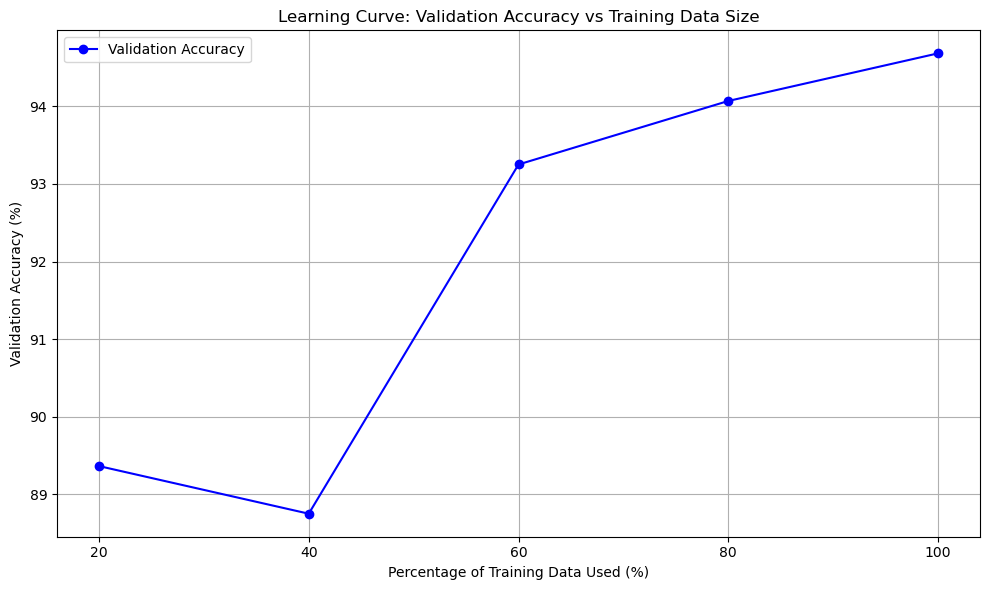


Summary of Results:
Percentage  |  Training Samples  |  Validation Accuracy  |  Validation Loss
----------------------------------------------------------------------
     20.0% |              1416 |             89.37% |          0.2650
     40.0% |              2832 |             88.75% |          0.2340
     60.0% |              4248 |             93.25% |          0.1689
     80.0% |              5664 |             94.07% |          0.1406
    100.0% |              7080 |             94.68% |          0.1162

Results saved to 'training_results.json'


In [9]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define the percentages of training data to use
train_percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
results = {
    'percentages': [],
    'train_samples': [],
    'val_accuracy': [],
    'val_loss': []
}

# Function to create and compile model with best parameters
def create_model(input_shape, num_classes, lstm_units, learning_rate):
    model = Sequential()
    model.add(LSTM(
        lstm_units,
        input_shape=input_shape,
        return_sequences=False,
        recurrent_dropout=0.2
    ))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )
    return model

# Train model with different percentages of data
for percentage in train_percentages:
    print(f"\nTraining with {percentage*100}% of training data")
    
    # Calculate number of training samples to use
    n_train_samples = int(len(train_one_hot) * percentage)
    
    # Get the subset of training data
    X_train_subset = train_one_hot[:n_train_samples]
    y_train_subset = train_encoded[:n_train_samples]
    
    # Create and compile model
    model = create_model(
        input_shape=(max_len, vocab_size),
        num_classes=len(label_encoder.classes_),
        lstm_units=best_params['lstm_units'],
        learning_rate=best_params['learning_rate']
    )
    
    # Callbacks
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        min_delta=0.001,
        mode='min',
        restore_best_weights=True,
        verbose=1
    )
    
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )
    
    # Train the model
    history = model.fit(
        X_train_subset,
        y_train_subset,
        batch_size=best_params['batch_size'],
        epochs=best_params['epochs'],
        validation_data=(valid_one_hot, valid_encoded),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    
    # Evaluate on validation set
    val_loss, val_accuracy = model.evaluate(
        valid_one_hot,
        valid_encoded,
        verbose=0
    )
    
    # Store results
    results['percentages'].append(percentage * 100)
    results['train_samples'].append(n_train_samples)
    results['val_accuracy'].append(val_accuracy)
    results['val_loss'].append(val_loss)
    
    print(f"\nResults for {percentage*100}% of training data:")
    print(f"Number of training samples: {n_train_samples}")
    print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
    print(f"Validation Loss: {val_loss:.4f}")

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(results['percentages'], 
         [acc * 100 for acc in results['val_accuracy']], 
         'bo-', 
         label='Validation Accuracy')
plt.xlabel('Percentage of Training Data Used (%)')
plt.ylabel('Validation Accuracy (%)')
plt.title('Learning Curve: Validation Accuracy vs Training Data Size')
plt.grid(True)
plt.legend()
plt.xticks(results['percentages'])
plt.tight_layout()
plt.show()

# Print summary table
print("\nSummary of Results:")
print("Percentage  |  Training Samples  |  Validation Accuracy  |  Validation Loss")
print("-" * 70)
for i in range(len(results['percentages'])):
    print(f"{results['percentages'][i]:9.1f}% |  {results['train_samples'][i]:16d} |  {results['val_accuracy'][i]*100:16.2f}% |  {results['val_loss'][i]:14.4f}")

# Save results to a file
import json
with open('training_results.json', 'w') as f:
    json.dump({
        'percentages': results['percentages'],
        'train_samples': results['train_samples'],
        'val_accuracy': [float(acc) for acc in results['val_accuracy']],
        'val_loss': [float(loss) for loss in results['val_loss']]
    }, f, indent=4)

print("\nResults saved to 'training_results.json'")

C:\Users\DELL\AppData\Local\Temp\ipykernel_15964\3811761241.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


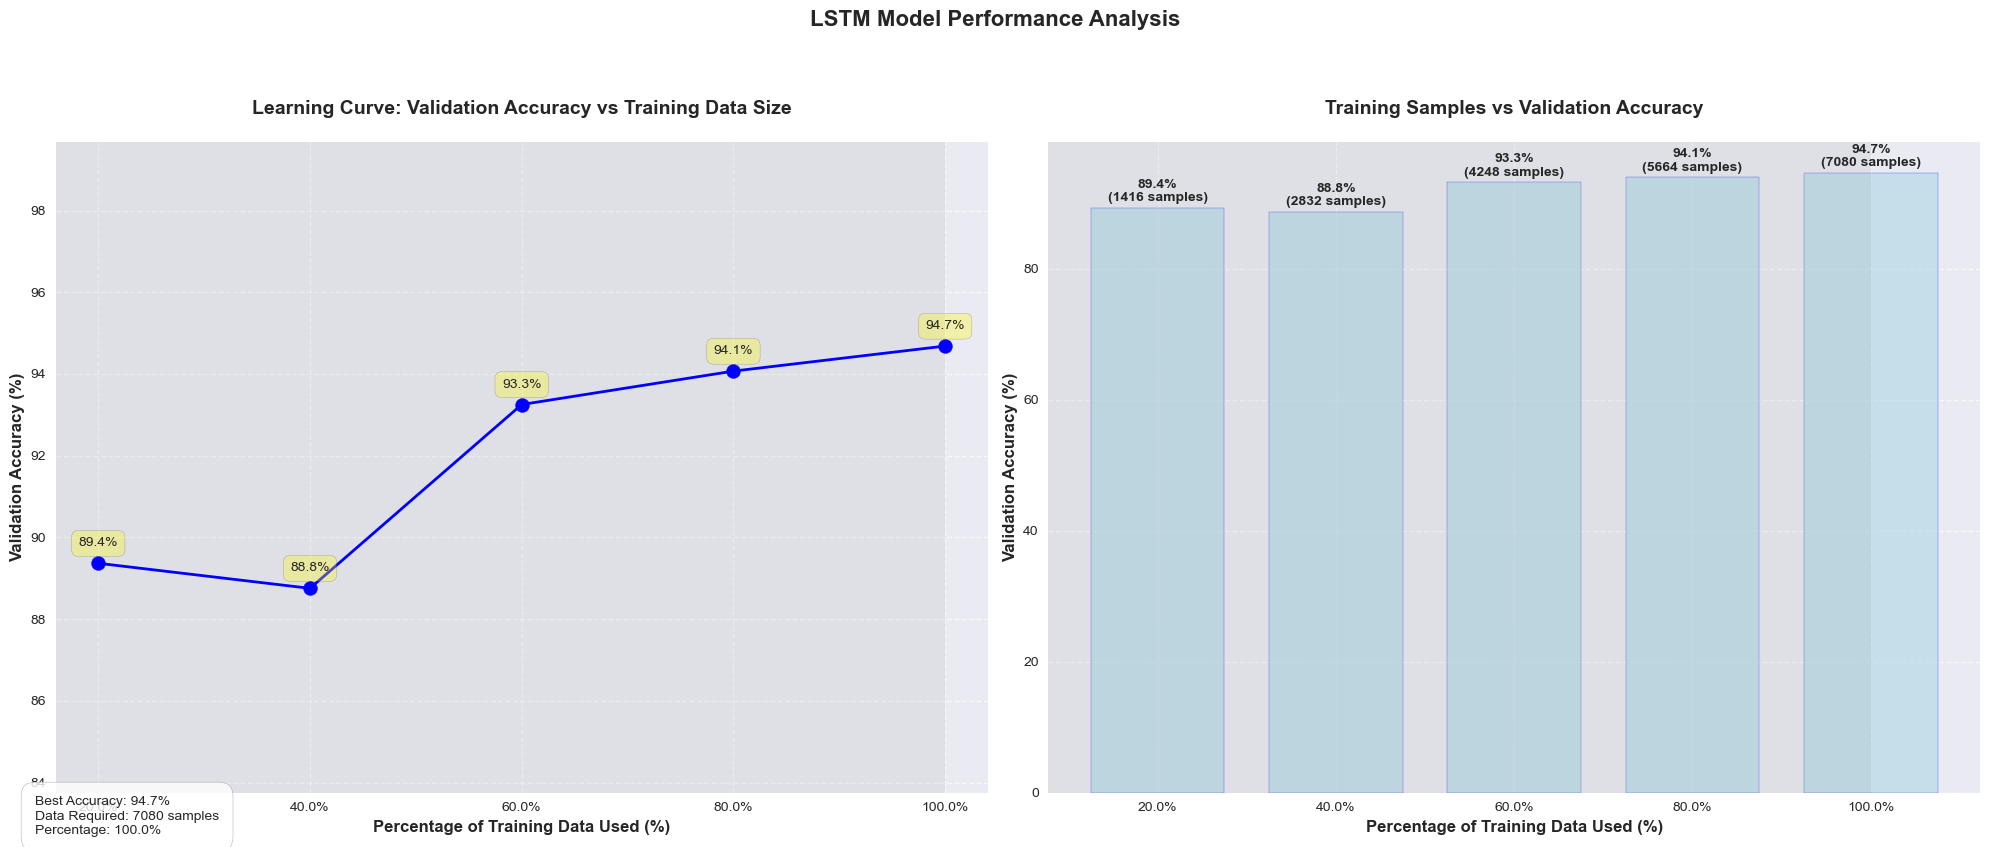


Detailed Performance Summary:
 Percentage  |    Training     |   Validation    |   Validation   
  of Data    |     Samples     |    Accuracy     |      Loss      
--------------------------------------------------------------------------------
    20.0%  |          1416  |         89.37%  |        0.2650
    40.0%  |          2832  |         88.75%  |        0.2340
    60.0%  |          4248  |         93.25%  |        0.1689
    80.0%  |          5664  |         94.07%  |        0.1406
   100.0%  |          7080  |         94.68%  |        0.1162

Results and visualizations have been saved.


In [24]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# [Previous training code remains the same until plotting]

# Set the style
plt.style.use('seaborn')
sns.set_palette("husl")

# Create figure and axis with larger size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Plot 1: Validation Accuracy
acc_line = ax1.plot(results['percentages'], 
                   [acc * 100 for acc in results['val_accuracy']], 
                   'b-', 
                   linewidth=2,
                   label='Validation Accuracy')

# Add points with annotations
for i, txt in enumerate(results['val_accuracy']):
    acc_percentage = txt * 100
    ax1.scatter(results['percentages'][i], acc_percentage, 
                color='blue', s=100, zorder=5)
    ax1.annotate(f'{acc_percentage:.1f}%', 
                 (results['percentages'][i], acc_percentage),
                 xytext=(0, 10), 
                 textcoords='offset points',
                 ha='center',
                 va='bottom',
                 fontsize=10,
                 bbox=dict(boxstyle='round,pad=0.5', 
                          fc='yellow', 
                          alpha=0.3))

# Customize first plot
ax1.set_xlabel('Percentage of Training Data Used (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Validation Accuracy (%)', fontsize=12, fontweight='bold')
ax1.set_title('Learning Curve: Validation Accuracy vs Training Data Size', 
              fontsize=14, 
              fontweight='bold', 
              pad=20)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xticks(results['percentages'])
ax1.set_xticklabels([f'{x}%' for x in results['percentages']], fontsize=10)
ax1.set_ylim(min([acc * 100 for acc in results['val_accuracy']]) - 5, 
             max([acc * 100 for acc in results['val_accuracy']]) + 5)

# Add light background shading
ax1.add_patch(Rectangle((0, 0), 100, 100,
                       fill=True,
                       alpha=0.1,
                       color='gray'))

# Plot 2: Training Samples vs Accuracy
ax2.bar(results['percentages'], 
        [acc * 100 for acc in results['val_accuracy']],
        alpha=0.6,
        color='lightblue',
        edgecolor='blue',
        width=15)

# Add value labels on bars
for i, v in enumerate([acc * 100 for acc in results['val_accuracy']]):
    ax2.text(results['percentages'][i], v + 0.5, 
             f'{v:.1f}%\n({results["train_samples"][i]} samples)',
             ha='center', 
             va='bottom',
             fontsize=10,
             fontweight='bold')

# Customize second plot
ax2.set_xlabel('Percentage of Training Data Used (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Validation Accuracy (%)', fontsize=12, fontweight='bold')
ax2.set_title('Training Samples vs Validation Accuracy', 
              fontsize=14, 
              fontweight='bold', 
              pad=20)
ax2.grid(True, linestyle='--', alpha=0.7)
ax2.set_xticks(results['percentages'])
ax2.set_xticklabels([f'{x}%' for x in results['percentages']], fontsize=10)

# Add light background shading
ax2.add_patch(Rectangle((0, 0), 100, 100,
                       fill=True,
                       alpha=0.1,
                       color='gray'))

# General styling
plt.suptitle('LSTM Model Performance Analysis', 
             fontsize=16, 
             fontweight='bold',
             y=1.05)

# Add a text box with summary statistics
stats_text = (f'Best Accuracy: {max(results["val_accuracy"])*100:.1f}%\n'
              f'Data Required: {results["train_samples"][np.argmax(results["val_accuracy"])]} samples\n'
              f'Percentage: {results["percentages"][np.argmax(results["val_accuracy"])]}%')
              
fig.text(0.02, 0.02, stats_text,
         fontsize=10,
         bbox=dict(facecolor='white', 
                  alpha=0.8, 
                  edgecolor='gray',
                  boxstyle='round,pad=1'))

plt.tight_layout()

# Save the plot with high DPI
plt.savefig('learning_curve_analysis.png', 
            dpi=300, 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')

plt.show()

# Print detailed summary table with formatting
print("\nDetailed Performance Summary:")
print("=" * 80)
print(f"{'Percentage':^12} | {'Training':^15} | {'Validation':^15} | {'Validation':^15}")
print(f"{'of Data':^12} | {'Samples':^15} | {'Accuracy':^15} | {'Loss':^15}")
print("-" * 80)
for i in range(len(results['percentages'])):
    print(f"{results['percentages'][i]:>8.1f}%  | "
          f"{results['train_samples'][i]:>13d}  | "
          f"{results['val_accuracy'][i]*100:>13.2f}%  | "
          f"{results['val_loss'][i]:>13.4f}")
print("=" * 80)

# Save results to a formatted JSON file
import json
with open('training_results.json', 'w') as f:
    json.dump({
        'experiment_summary': {
            'best_accuracy': f"{max(results['val_accuracy'])*100:.1f}%",
            'best_accuracy_samples': results['train_samples'][np.argmax(results['val_accuracy'])],
            'best_accuracy_percentage': f"{results['percentages'][np.argmax(results['val_accuracy'])]}%"
        },
        'detailed_results': {
            'percentages': results['percentages'],
            'train_samples': results['train_samples'],
            'val_accuracy': [float(acc) for acc in results['val_accuracy']],
            'val_loss': [float(loss) for loss in results['val_loss']]
        }
    }, f, indent=4)

print("\nResults and visualizations have been saved.")

In [23]:

print("\nTraining Results:")
print(f"Best Validation Accuracy: {best_val_accuracy:.4f}")
print("Best Hyperparameters:")
print(f"LSTM Units: {best_params['lstm_units']}")
print(f"Batch Size: {best_params['batch_size']}")
print(f"Learning Rate: {best_params['learning_rate']}")
print(f"Actual Epochs Trained: {best_params['epochs']}")
print(f"Stopped at Epoch: {best_params['stopped_epoch']}")


Training Results:
Best Validation Accuracy: 0.9530
Best Hyperparameters:
LSTM Units: 10
Batch Size: 32
Learning Rate: 0.005
Actual Epochs Trained: 20
Stopped at Epoch: 0


In [22]:
# Get model configuration and parameters
def print_model_params(model):
    print("\nModel Architecture:")
    model.summary()
    
    print("\nLayer-wise Parameters:")
    for layer in model.layers:
        print(f"\nLayer: {layer.name}")
        print(f"Type: {layer.__class__.__name__}")
        
        if isinstance(layer, LSTM):
            print(f"LSTM Units: {layer.units}")
            print(f"Return Sequences: {layer.return_sequences}")
            print(f"Recurrent Dropout: {layer.recurrent_dropout}")
        
        elif isinstance(layer, Dense):
            print(f"Units: {layer.units}")
            print(f"Activation: {layer.activation.__name__}")
        
        elif isinstance(layer, Dropout):
            print(f"Dropout Rate: {layer.rate}")
    
    print("\nCompilation Parameters:")
    print(f"Optimizer: {model.optimizer.__class__.__name__}")
    print(f"Learning Rate: {model.optimizer.learning_rate.numpy()}")
    print(f"Loss Function: {model.loss}")
    print(f"Metrics: {model.metrics_names}")
    
    print("\nInput Shape:", model.input_shape)
    print("Output Shape:", model.output_shape)

# Get training parameters
print("\nTraining Parameters:")
print(f"Max Sequence Length: {max_len}")
print(f"Vocabulary Size: {vocab_size}")

# Print model parameters
print_model_params(model)

# Optional: Save parameters to a JSON file
model_params = {
    'architecture': {
        'input_shape': tuple(model.input_shape[1:]),
        'output_shape': tuple(model.output_shape[1:])
    },
    'training': {
        'max_len': max_len,
        'vocab_size': vocab_size,
        'learning_rate': float(model.optimizer.learning_rate.numpy()),
        'loss_function': model.loss,
        'metrics': model.metrics_names
    },
    'preprocessing': {
        'padding': 'post',
        'tokenizer_vocab_size': len(tokenizer.word_index) + 1
    }
}

# Save parameters to file
with open('model_parameters.json', 'w') as f:
    json.dump(model_params, f, indent=4)

print("\nParameters saved to 'model_parameters.json'")

# Print example usage for future reference
print("\nExample code to recreate model with these parameters:")
print("""
# Create model with extracted parameters
model = Sequential([
    LSTM(
        units={lstm_units},
        input_shape={input_shape},
        return_sequences=False,
        recurrent_dropout=0.2
    ),
    Dropout(0.3),
    Dense({output_units}, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate={learning_rate}),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
""".format(
    lstm_units=model.layers[0].units,
    input_shape=tuple(model.input_shape[1:]),
    output_units=model.layers[-1].units,
    learning_rate=float(model.optimizer.learning_rate.numpy())
))
def get_training_params(model):
    # Get training history if available
    if hasattr(model, 'history') and model.history is not None:
        history = model.history.history
        epochs_trained = len(history['loss'])
        print("\nTraining Parameters:")
        print(f"Total Epochs Trained: {epochs_trained}")
        
        # Try to get batch size from model's training config
        if hasattr(model, '_train_counter'):
            steps_per_epoch = model._train_counter // epochs_trained
            if hasattr(model, 'train_data') and model.train_data is not None:
                batch_size = len(model.train_data) // steps_per_epoch
                print(f"Batch Size: {batch_size}")
    else:
        print("\nNo training history found. The model might need to be trained first.")

    # Get current model configuration
    print("\nModel Configuration:")
    model.summary()
    
    # Get optimizer configuration
    print("\nOptimizer Settings:")
    print(f"Optimizer: {model.optimizer.__class__.__name__}")
    print(f"Learning Rate: {model.optimizer.learning_rate.numpy()}")

# Alternative: If you've saved the model's history during training
if 'history' in locals() or 'history' in globals():
    print("\nFrom training history:")
    print(f"Epochs run: {len(history.history['loss'])}")
    print(f"Final loss: {history.history['loss'][-1]:.4f}")
    print(f"Final accuracy: {history.history['accuracy'][-1]:.4f}")


Training Parameters:
Max Sequence Length: 13
Vocabulary Size: 215

Model Architecture:


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_58 (LSTM)                  │ (None, 10)             │         9,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,188 (106.21 KB)

 Trainable params: 9,062 (35.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,126 (70.81 KB)


Layer-wise Parameters:

Layer: lstm_58
Type: LSTM
LSTM Units: 10
Return Sequences: False
Recurrent Dropout: 0.2

Layer: dropout_58
Type: Dropout
Dropout Rate: 0.3

Layer: dense_58
Type: Dense
Units: 2
Activation: softmax

Compilation Parameters:
Optimizer: Adam
Learning Rate: 0.004999999888241291
Loss Function: sparse_categorical_crossentropy
Metrics: ['loss', 'compile_metrics']

Input Shape: (None, 13, 215)
Output Shape: (None, 2)

Parameters saved to 'model_parameters.json'

Example code to recreate model with these parameters:

# Create model with extracted parameters
model = Sequential([
    LSTM(
        units=10,
        input_shape=(13, 215),
        return_sequences=False,
        recurrent_dropout=0.2
    ),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.004999999888241291),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


From training history:
Epochs run: 20
Final loss: 0

In [1]:
test_emoticon_df = pd.read_csv("datasets/test/test_emoticon.csv") 
test_emoticon_X = test_emoticon_df['input_emoticon'].tolist() 
# test_emoticon_Y = test_emoticon_df['label'].tolist() 
# Process test data
test_sequences = tokenizer.texts_to_sequences(test_emoticon_X)
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post')
test_one_hot = tf.keras.utils.to_categorical(test_padded, num_classes=vocab_size)

# Process test data
test_sequences = tokenizer.texts_to_sequences(test_emoticon_X)
test_padded = pad_sequences(test_sequences, maxlen=max_len, padding='post')
test_one_hot = tf.keras.utils.to_categorical(test_padded, num_classes=vocab_size)

# Get predictions
predictions = model.predict(test_one_hot)
predicted_classes = np.argmax(predictions, axis=1)

# Save predictions to text file, one label per line
with open('pred_emoticon.txt', 'w') as f:
    for pred in predicted_classes:
        f.write(f"{pred}\n")

# Print confirmation and first few predictions
print(f"Predictions saved to pred_emoticon.txt")
print("\nFirst few predictions:")
print(predicted_classes[:10])
print(f"\nTotal predictions written: {len(predicted_classes)}")

NameError: name 'pd' is not defined